In [41]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
import datetime
import operator
from statsmodels.tools.eval_measures import rmse
from pmdarima import auto_arima

# SKlearn Library

from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

plt.style.use('seaborn')
%matplotlib inline

In [42]:
confirmed_cases = pd.read_csv("/Users/antonyvibin/Desktop/Covid19/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv")


In [43]:
# Separating Confirmed cases for India

India_confirmed = confirmed_cases[confirmed_cases["Country/Region"] == 'India']

In [44]:
India_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
15,NaN,India,21.0,78.0,0,0,0,0,0,0,...,102,113,119,142,156,194,244,330,396,396.0


In [45]:
india_df = India_confirmed.transpose().reset_index()
india_df = india_df.iloc[4:,:]
india_df.columns = ["Dates", "Count"]

In [46]:
# Replacing null values to 0 and Removing Null Values

india_df = india_df.replace(0, np.nan)
india_df = india_df.dropna()

In [47]:
# Confirmed cases in India Cases and timeseries conversion

india_df = india_df.reset_index(drop = True)

india_df["Dates"] = pd.to_datetime(india_df.Dates)
india_df = india_df.set_index("Dates")

In [48]:
india_df 

,Count
Dates,
2020-01-30,1.0
2020-01-31,1.0
2020-02-01,1.0
2020-02-02,2.0
2020-02-03,3.0
2020-02-04,3.0
2020-02-05,3.0
2020-02-06,3.0
2020-02-07,3.0


In [49]:
# Finding the shape of dataframe
india_df.shape

(54, 1)

### Building ARIMA model to forecaset corona in India for the next 10 days

In [71]:
train, test = india_df[:53], india_df[53:]

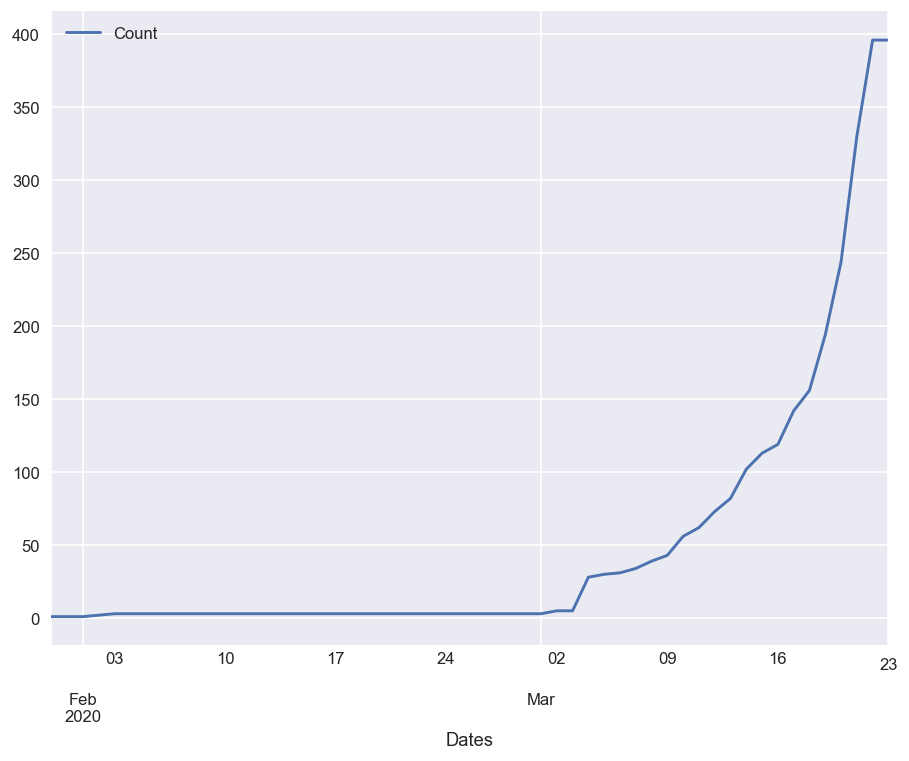

In [72]:
# Visualizing the time series

india_df.plot()
plt.show()

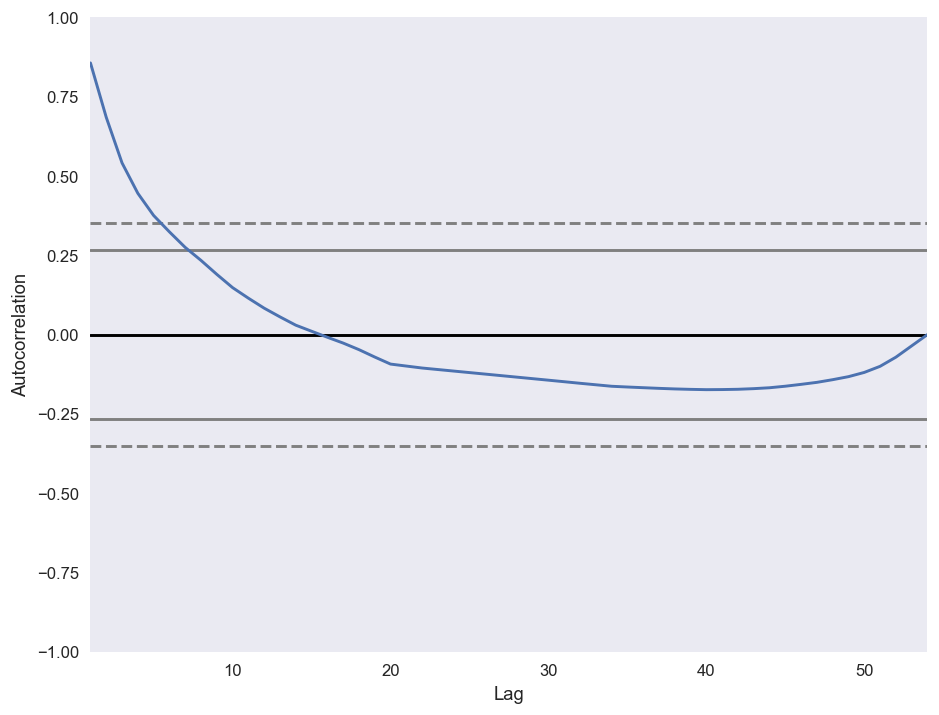

In [73]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(india_df)
plt.show()

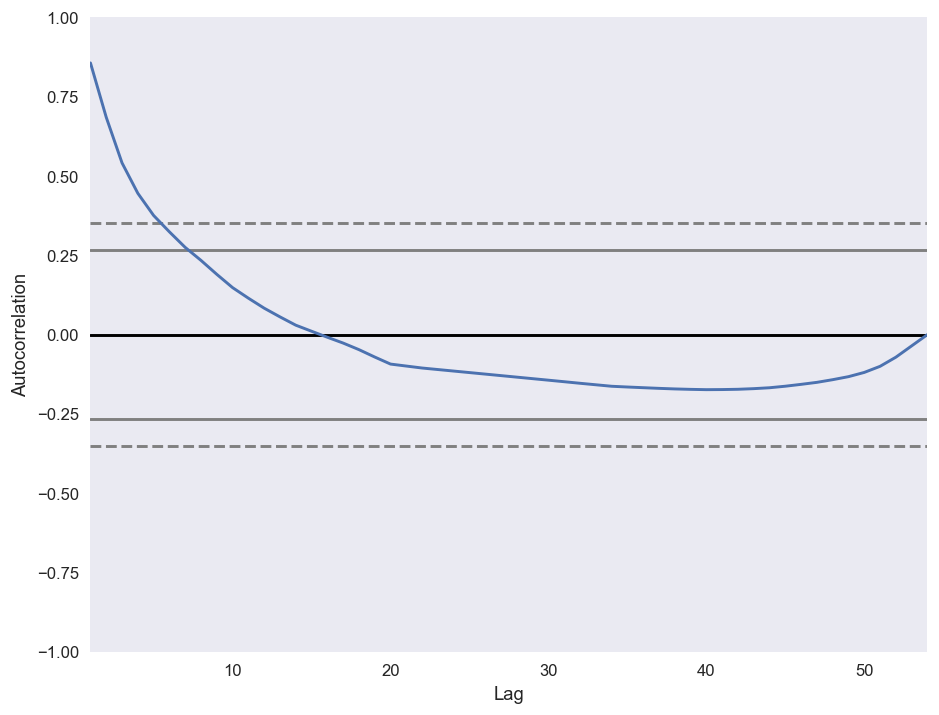

In [74]:
pd.plotting.autocorrelation_plot(india_df)

In [75]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(india_df.Count.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 5.014703
p-value: 1.000000


In [77]:
#from statsmodels.tsa.arima_model import ARIMA
#import pmdarima as pm
from pmdarima import auto_arima

model = auto_arima(india_df.Count, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=419.811, BIC=427.616, Time=0.098 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=416.702, BIC=420.604, Time=0.007 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=418.664, BIC=424.518, Time=0.016 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=418.615, BIC=424.469, Time=0.036 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=414.702, BIC=416.653, Time=0.008 seconds
Total fit time: 0.176 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   54
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -206.351
Date:                Thu, 26 Mar 2020   AIC                            414.702
Time:                        22:28:04   BIC                            416.653
Sample:                             0   HQIC       

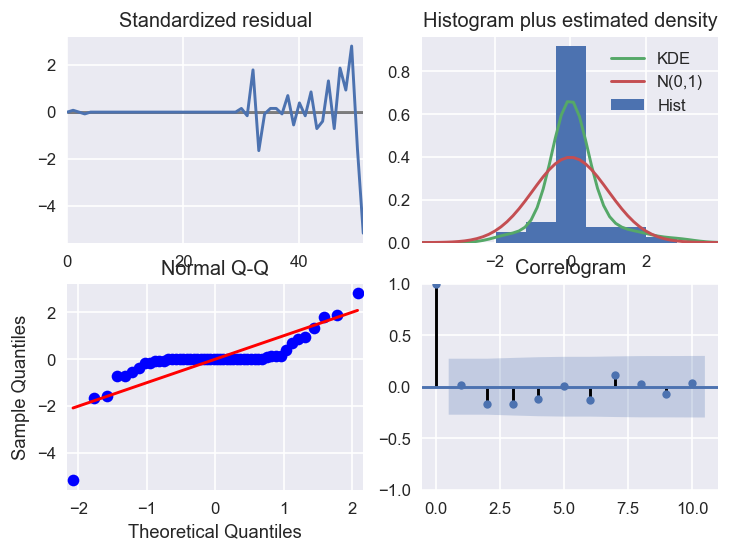

In [78]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

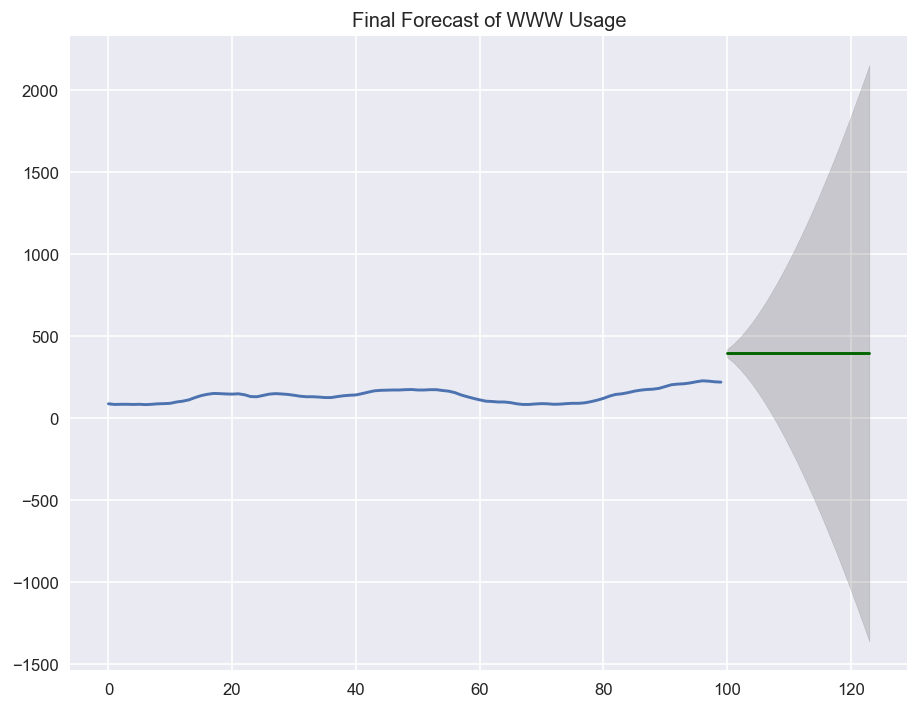

In [79]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()